In [2]:
import pandas as pd
import numpy as np


1. Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill. Also find the sunny places to setup a solar field. Take values more than 75 percentile as minimum values for analysis.

2. Find the locations where humidity and temperature are more than 80 percentile value.

3. Find 3 places where rainfall, sunshine, humidity is not too high or too low[ Use logical threshold using percentile values]

4. Find the top 3 places where rainfall is high, but cloud cover is low and vice versa. Take cloud cover avg>5.

5. Which wind direction causes rains in which cities ?

6. Find top 5 coastal cities in which evaporation is higher than mean so that we can choose these places for salt preparation plants?

7. Suggest a strategy to a winter goods company to choose the location and months to promote their products.

8. What factors effect tomorrow rain column the most in weather dataset ?

9. Create a new column as rainfall level with values as no, low, medium, high, heavy as categories and do the bivariate analyses between rainfall level and wind direction - no rain ------> 0 percentile -low --------->0-25 percentile -medium--------->25-50 percentile -high--------->50-75 percentile -heavy--------->75-100 percentile

10. Plot the correlation heatmap between the numerical variables.

##### 1. Find the windy (Highest wind speed and frequent high-speed winds) places to build a windmill. Also find the sunny places to setup a solar field. Take values more than 75 percentile as minimum values for analysis.


In [3]:
#loading the dataset
weatherdf = pd.read_csv('Rain Prediction Train.csv')
weatherdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No


In [4]:
#highest windspeed locations
weatherdf[['Location','WindGustSpeed']].sort_values(by='WindGustSpeed',ascending=False).head()

,Location,WindGustSpeed
7197,Townsville,135.0
72545,Woomera,135.0
35513,Hobart,130.0
24271,Wollongong,126.0
54132,Woomera,122.0


In [5]:
#top 5 places where windmill can be built based on avg windspeed 
weatherdf.groupby('Location').agg({'WindGustSpeed':'mean'}).sort_values(by='WindGustSpeed',ascending=False).head()

,WindGustSpeed
Location,
Hobart,47.572130
MelbourneAirport,47.065598
SydneyAirport,47.011888
MountGinini,46.289501
Wollongong,45.852144


In [6]:
weatherdf.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

##### 2 . Find the locations where humidity and temperature are more than 80 percentile value.

In [7]:
#Adding a column to dataset for average humidity per day and findind the 80% quantile
avgHumTempdf= weatherdf
avgHumTempdf['avgHumidity']=(avgHumTempdf['Humidity9am']+avgHumTempdf['Humidity3pm'])/2
avgHumTempdf['avgTemperature']=(avgHumTempdf['Temp9am']+avgHumTempdf['Temp3pm'])/2
avgHumTempdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,avgHumidity,avgTemperature
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No,71.0,22.85
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes,51.0,17.90
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No,49.5,18.20
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No,70.5,19.75
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No,53.5,23.65


In [8]:
hum80per=avgHumTempdf['avgHumidity'].quantile(0.8)
hum80per

76.0

In [9]:
temp80per=avgHumTempdf['avgTemperature'].quantile(0.8)
temp80per

25.1

In [10]:
#Locations where humidity and temp >80% value
avgHumTempdf.query('avgHumidity>76 and avgTemperature>25.1')['Location'].unique()


array(['GoldCoast', 'Darwin', 'Cairns', 'Townsville', 'Williamtown',
       'NorfolkIsland', 'Katherine', 'SydneyAirport', 'NorahHead',
       'Brisbane', 'Sydney', 'Newcastle', 'AliceSprings', 'Wollongong',
       'BadgerysCreek', 'Uluru', 'CoffsHarbour', 'Moree', 'Penrith',
       'Canberra', 'Albany', 'WaggaWagga', 'MelbourneAirport', 'Woomera',
       'Richmond', 'Walpole', 'PerthAirport', 'Cobar', 'Portland',
       'Watsonia'], dtype=object)

In [11]:
weatherdf.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'avgHumidity',
       'avgTemperature'],
      dtype='object')

##### 3.Find 3 places where rainfall, sunshine, humidity is not too high or too low[ Use logical threshold using percentile values]

In [12]:
#Find 3 places where rainfall, sunshine, humidity is not too high or too low[ Use logical threshold using percentile values]
#lets take 25% and 75% as logical threshold
avgRainSunHumdf= weatherdf
avgRainSunHumdf['avgHumidity']=(avgRainSunHumdf['Humidity9am']+avgRainSunHumdf['Humidity3pm'])/2
hum80per=avgRainSunHumdf['avgHumidity'].quantile(0.8)
sun80per=avgRainSunHumdf['Sunshine'].quantile(0.8)
rain80per=avgRainSunHumdf['Rainfall'].quantile(0.8)
avgRainSunHumdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,avgHumidity,avgTemperature
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No,71.0,22.85
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes,51.0,17.90
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No,49.5,18.20
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No,70.5,19.75
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No,53.5,23.65


In [13]:
avgRainSunHumdf[(avgRainSunHumdf['avgHumidity']>hum80per) & (avgRainSunHumdf['Sunshine']>sun80per) & (avgRainSunHumdf['Rainfall']>rain80per)]['Location'].unique()

array(['Portland', 'NorfolkIsland', 'Hobart', 'Williamtown', 'Albany'],
      dtype=object)

##### 4.Find the top 3 places where rainfall is high, but cloud cover is low and vice versa. Take cloud cover avg>5.

In [14]:
#create a new column for avg cloud cover. Lets take  a lower threshold value of < 25% and upper threshold value > 75% for generalising 
#low cloud cover high rainfall
clouddf= weatherdf
clouddf['avgCloud'] = (clouddf['Cloud9am']+clouddf['Cloud3pm'])/2
cloud25per=clouddf['avgCloud'].quantile(0.25)
rain75per=clouddf['Rainfall'].quantile(0.75)
clouddf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,avgHumidity,avgTemperature,avgCloud
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,1016.5,7.0,4.0,21.5,24.2,Yes,No,71.0,22.85,5.5
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,1008.8,7.0,8.0,14.0,21.8,No,Yes,51.0,17.90,7.5
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,1019.4,2.0,7.0,12.8,23.6,No,No,49.5,18.20,4.5
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,1010.6,NaN,NaN,18.9,20.6,No,No,70.5,19.75,NaN
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1011.8,1.0,1.0,21.7,25.6,No,No,53.5,23.65,1.0


In [15]:
clouddf[(clouddf['avgCloud']<cloud25per) & (clouddf['Rainfall']>rain75per)]['Location'].unique()

array(['Watsonia', 'WaggaWagga', 'Mildura', 'Woomera', 'MelbourneAirport',
       'SydneyAirport', 'Sydney', 'Bendigo', 'Cobar', 'Brisbane',
       'Hobart', 'NorfolkIsland', 'Newcastle', 'MountGambier',
       'CoffsHarbour', 'Cairns', 'Darwin', 'Townsville', 'Williamtown',
       'PerthAirport', 'Perth', 'Katherine', 'Moree', 'Nuriootpa',
       'Albury', 'Sale', 'Albany', 'Portland', 'Wollongong',
       'AliceSprings', 'Canberra', 'PearceRAAF', 'Richmond', 'Melbourne',
       'Launceston', 'Ballarat'], dtype=object)

In [16]:
#high cloud cover low rainfall
cloud75per=clouddf['avgCloud'].quantile(0.75)
rain25per=clouddf['Rainfall'].quantile(0.25)
clouddf[(clouddf['avgCloud']>cloud75per) & (clouddf['Rainfall']<rain25per)]['Location'].unique()

array([], dtype=object)

In [17]:
#high cloud cover low rainfall
#since we got empty list above, letstry with 50% rainfall value
cloud75per=clouddf['avgCloud'].quantile(0.75)
rain50per=clouddf['Rainfall'].quantile(0.50)
clouddf[(clouddf['avgCloud']>cloud75per) & (clouddf['Rainfall']<rain50per)]['Location'].unique()

array([], dtype=object)

In [18]:
weatherdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
Date              100000 non-null object
Location          100000 non-null object
MinTemp           99564 non-null float64
MaxTemp           99784 non-null float64
Rainfall          99030 non-null float64
Evaporation       57367 non-null float64
Sunshine          52518 non-null float64
WindGustDir       93419 non-null object
WindGustSpeed     93460 non-null float64
WindDir9am        92938 non-null object
WindDir3pm        97309 non-null object
WindSpeed9am      99062 non-null float64
WindSpeed3pm      98146 non-null float64
Humidity9am       98762 non-null float64
Humidity3pm       97456 non-null float64
Pressure9am       90163 non-null float64
Pressure3pm       90188 non-null float64
Cloud9am          62372 non-null float64
Cloud3pm          59989 non-null float64
Temp9am           99380 non-null float64
Temp3pm           98090 non-null float64
RainToday         99030 non-null

##### 5. Which wind direction causes rains in which cities ?

In [19]:
weatherdf[weatherdf['RainToday']=='Yes'].dropna().groupby(['WindDir9am','WindDir9am','Location']).agg({'Rainfall':'mean'})

Rainfall
WindDir9am WindDir9am Location                   
E          E          AliceSprings      14.350000
                      Brisbane          20.895652
                      Cairns             5.371429
                      Canberra          11.533333
                      Cobar             17.200000
                      CoffsHarbour      31.633333
                      Darwin            14.165217
                      Hobart             5.066667
                      MelbourneAirport   6.800000
                      Mildura            4.466667
                      Moree             11.412500
                      MountGambier       4.733333
                      NorfolkIsland      6.521053
                      Nuriootpa          5.100000
                      Perth              4.571429
                      PerthAirport      10.200000
                      Portland          11.880000
                      Sale               5.000000
                      Sydney             3.566667
                      SydneyAirport     10.747368
                      Townsville        14.023529
                      WaggaWagga         7.019355
                      Watsonia           7.433333
                      Williamtown        8.200000
                      Woomera            7.666667
ENE        ENE        AliceSprings      11.563636
                      Brisbane          11.352381
                      Cairns            18.400000
                      Canberra           9.300000
                      Cobar              7.133333
...                                           ...
WNW        WNW        WaggaWagga         9.885714
                      Watsonia           6.769231
                      Williamtown        6.760000
                      Woomera            6.480000
WSW        WSW        AliceSprings       7.150000
                      Brisbane           7.221053
                      Cairns             9.866667
                      Canberra          26.600000
                      Cobar              1.800000
                      CoffsHarbour      13.252459
                      Darwin            18.186207
                      Hobart             5.025000
                      Melbourne         10.067797
                      MelbourneAirport   6.501370
                      Mildura            7.750000
                      Moree             12.542857
                      MountGambier       7.685714
                      NorfolkIsland      4.038710
                      Nuriootpa          6.924490
                      Perth             11.452632
                      PerthAirport      10.553333
                      Portland           5.962667
                      Sale               9.019048
                      Sydney            12.312500
                      SydneyAirport     10.825000
                      Townsville         7.933333
                      WaggaWagga         8.035714
                      Watsonia           8.101754
                      Williamtown        9.937500
                      Woomera            8.569231

[414 rows x 1 columns]

##### 6. Find top 5 coastal cities in which evaporation is higher than mean so that we can choose these places for salt preparation plants?

In [20]:
#add coastal city column
#coastal city list is made by using the information from wikipedia.[https://en.wikipedia.org/wiki/Category:Coastal_cities_in_Australia]
coastalCityList=['Adelaide','Brisbane','Bunbury','Busselton','Cairns','Caloundra','Coffs Harbour','Darwin','Devonport','Geelong','Geraldton','Gladstone','Gold Coast, Queensland','Gosford','Hervey Bay','Hobart','Mackay','Mandurah','Melbourne','Port Augusta','Port Lincoln','Portland','Redcliffe Peninsula','Redland City','City of Shoalhaven','Townsville','Warrnambool','Whyalla','Wollongong']
coastaldf=weatherdf
iscoastal=[]
for loc in weatherdf['Location']:
    if loc in coastalCityList:
        iscoastal.append('Yes')
    else:
        iscoastal.append('No')
coastaldf['isCoastal'] = iscoastal
coastaldf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,avgHumidity,avgTemperature,avgCloud,isCoastal
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,7.0,4.0,21.5,24.2,Yes,No,71.0,22.85,5.5,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,7.0,8.0,14.0,21.8,No,Yes,51.0,17.90,7.5,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,2.0,7.0,12.8,23.6,No,No,49.5,18.20,4.5,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,NaN,NaN,18.9,20.6,No,No,70.5,19.75,NaN,Yes
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,1.0,1.0,21.7,25.6,No,No,53.5,23.65,1.0,Yes


In [21]:
coastaldf[coastaldf['Evaporation']>(coastaldf['Evaporation'].mean())]['Location'].unique()

array(['Townsville', 'Sale', 'Moree', 'Dartmoor', 'Woomera', 'Mildura',
       'Nuriootpa', 'MelbourneAirport', 'WaggaWagga', 'Sydney', 'Darwin',
       'AliceSprings', 'Katherine', 'Albany', 'Bendigo', 'Brisbane',
       'SydneyAirport', 'Cairns', 'Perth', 'CoffsHarbour', 'Canberra',
       'Cobar', 'Portland', 'Richmond', 'NorfolkIsland', 'Melbourne',
       'Watsonia', 'PerthAirport', 'Launceston', 'Adelaide', 'Hobart',
       'MountGambier', 'Williamtown'], dtype=object)

##### 7. Suggest a strategy to a winter goods company to choose the location and months to promote their products.

In [22]:
winterdf = weatherdf
winterdf['Date']=pd.to_datetime(winterdf['Date'])
winterdf['day']=winterdf['Date'].dt.day
winterdf['month']=winterdf['Date'].dt.month
winterdf['year']=winterdf['Date'].dt.year

In [23]:
winterdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,avgHumidity,avgTemperature,avgCloud,isCoastal,day,month,year
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,24.2,Yes,No,71.0,22.85,5.5,No,2,7,2014
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,21.8,No,Yes,51.0,17.90,7.5,Yes,23,4,2009
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,23.6,No,No,49.5,18.20,4.5,No,11,8,2015
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,20.6,No,No,70.5,19.75,NaN,Yes,21,11,2012
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,25.6,No,No,53.5,23.65,1.0,Yes,30,7,2013


In [24]:
import seaborn as sb
%matplotlib inline

In [25]:
import matplotlib.pyplot as plt

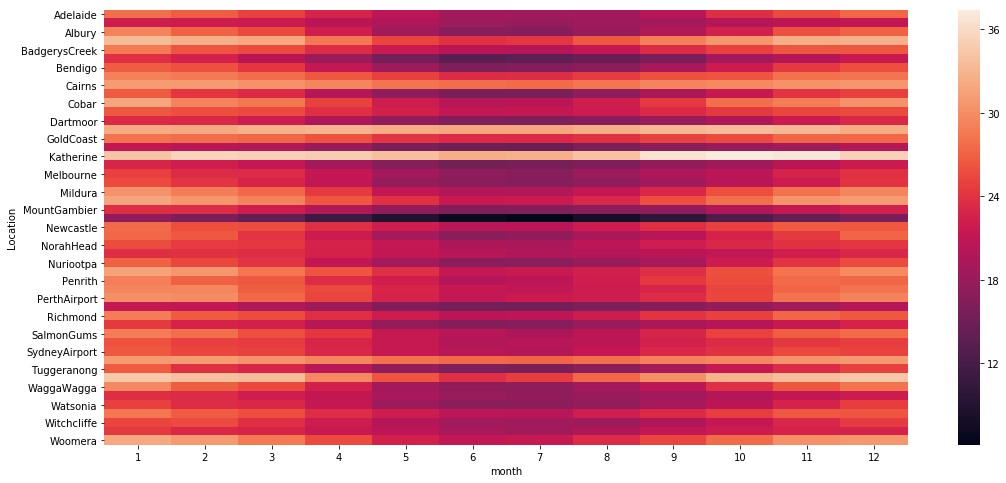

In [26]:
#the heatmap is only for visual understanding of the data but not to conclude anything
wintermonthpt=pd.pivot_table(winterdf,index='Location',columns='month',values='MaxTemp',aggfunc='mean')
plt.figure(figsize=(18,8))
sb.heatmap(wintermonthpt)

In [27]:
#from above heatmap we can generalize that the lowest temperatures are recorded in the months of may to august
#lets add a column to our data frame called avg temp
winterdf['avgTemp']=(winterdf['MinTemp']+winterdf['MaxTemp'])/2
winterdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RainTomorrow,avgHumidity,avgTemperature,avgCloud,isCoastal,day,month,year,avgTemp
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,Yes,No,71.0,22.85,5.5,No,2,7,2014,21.80
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,No,Yes,51.0,17.90,7.5,Yes,23,4,2009,14.35
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,No,No,49.5,18.20,4.5,No,11,8,2015,15.95
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,No,No,70.5,19.75,NaN,Yes,21,11,2012,18.30
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,No,No,53.5,23.65,1.0,Yes,30,7,2013,20.30


In [28]:
#From the following dataframe we can conclude the coldest locations buy month which we can suggest to the winter goods company
winterdf.groupby(['Location','month']).agg({'avgTemp':'mean'}).sort_values(by='avgTemp',ascending=True)

avgTemp
Location    month           
MountGinini 7       3.097892
            6       4.066185
            8       4.239809
            5       5.454242
            9       5.738217
            4       7.334161
            10      7.854971
Ballarat    6       9.163663
Canberra    7       9.361979
Ballarat    7       9.426000
Tuggeranong 7       9.627273
MountGinini 11      9.666768
Canberra    6       9.689646
MountGinini 3       9.954011
Ballarat    8      10.112849
Launceston  6      10.116851
Tuggeranong 6      10.159538
Launceston  7      10.174412
Tuggeranong 8      10.421637
Canberra    8      10.436579
            5      10.513393
Hobart      7      10.639356
Bendigo     6      10.790811
Tuggeranong 5      10.832105
Hobart      6      10.861264
Ballarat    5      10.864975
Launceston  8      10.908242
Bendigo     7      10.924719
MountGinini 12     10.936257
Ballarat    9      10.995954
...                      ...
Townsville  3      26.314541
Darwin      6      26.419505
Cairns      3      26.484359
Townsville  11     26.499112
Uluru       12     26.611170
Cairns      12     26.669940
Townsville  12     26.860651
Darwin      8      26.891206
Townsville  2      27.009177
Cairns      2      27.056587
Uluru       1      27.142308
Townsville  1      27.159024
Cairns      1      27.159948
Katherine   4      27.395213
Darwin      5      27.443467
            2      28.050000
            1      28.243386
            9      28.360000
            12     28.405249
            3      28.452591
            4      28.497238
Katherine   1      28.642442
Darwin      10     28.716582
Katherine   3      28.854598
Darwin      11     28.862500
Katherine   9      28.963793
            2      29.042105
            12     29.104938
            10     30.131667
            11     30.256250

[588 rows x 1 columns]

##### 8.What factors effect tomorrow rain column the most in weather dataset ?

In [29]:
weatherdf1 = pd.read_csv('Rain Prediction Train.csv')


In [30]:
#we add a numeric rain tomorrow column based on the nominal rain tomorrow column so that we can find the correlation between rainfall tomorrow and other fields
RT=[]
for r in weatherdf1['RainTomorrow']:
    if r == 'Yes':
        RT.append(1)
    else:
        RT.append(0)
weatherdf1['RainTom']=RT
weatherdf1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTom
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No,0
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes,1
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No,0
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No,0
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No,0


In [31]:
weatherdf1.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTom
MinTemp,1.000000,0.736209,0.104916,0.466384,0.069888,0.176233,0.178393,0.175261,-0.235857,0.005866,-0.450395,-0.460772,0.076054,0.021259,0.902107,0.708628,0.084689
MaxTemp,0.736209,1.000000,-0.076213,0.588620,0.468293,0.064940,0.015954,0.048687,-0.506802,-0.509531,-0.330587,-0.426370,-0.293684,-0.279904,0.886949,0.984458,-0.158832
Rainfall,0.104916,-0.076213,1.000000,-0.060255,-0.233248,0.132453,0.086308,0.058768,0.225008,0.257368,-0.171688,-0.129264,0.201709,0.175763,0.011025,-0.080996,0.240272
Evaporation,0.466384,0.588620,-0.060255,1.000000,0.367904,0.199948,0.193278,0.127276,-0.507558,-0.393446,-0.268210,-0.292371,-0.188004,-0.186487,0.544734,0.575120,-0.120099
Sunshine,0.069888,0.468293,-0.233248,0.367904,1.000000,-0.037569,0.004861,0.051760,-0.490532,-0.627942,0.044981,-0.017057,-0.677647,-0.704076,0.288251,0.488589,-0.451696
WindGustSpeed,0.176233,0.064940,0.132453,0.199948,-0.037569,1.000000,0.605773,0.686003,-0.211206,-0.023670,-0.461316,-0.416158,0.072010,0.108836,0.147680,0.029923,0.234096
WindSpeed9am,0.178393,0.015954,0.086308,0.193278,0.004861,0.605773,1.000000,0.518604,-0.268542,-0.031713,-0.232503,-0.180206,0.025888,0.055461,0.130593,0.006915,0.091742
WindSpeed3pm,0.175261,0.048687,0.058768,0.127276,0.051760,0.686003,0.518604,1.000000,-0.141777,0.019224,-0.296353,-0.255636,0.056233,0.026819,0.161744,0.026515,0.088916
Humidity9am,-0.235857,-0.506802,0.225008,-0.507558,-0.490532,-0.211206,-0.268542,-0.141777,1.000000,0.668193,0.138149,0.186529,0.454512,0.357837,-0.474109,-0.501338,0.256631
Humidity3pm,0.005866,-0.509531,0.257368,-0.393446,-0.627942,-0.023670,-0.031713,0.019224,0.668193,1.000000,-0.028920,0.051257,0.519745,0.523752,-0.221684,-0.558421,0.445322


In [32]:
weatherdf1.corr(method='spearman')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTom
MinTemp,1.000000,0.737974,0.020674,0.579523,0.111144,0.202286,0.183138,0.181941,-0.223426,0.029300,-0.464799,-0.469254,0.063714,0.011218,0.899141,0.709402,0.076959
MaxTemp,0.737974,1.000000,-0.299958,0.696763,0.498030,0.091990,0.025554,0.063998,-0.469628,-0.461738,-0.353801,-0.444761,-0.296703,-0.289972,0.891561,0.984463,-0.158296
Rainfall,0.020674,-0.299958,1.000000,-0.309981,-0.400344,0.129012,0.082989,0.068642,0.442183,0.442737,-0.157237,-0.065160,0.373575,0.321178,-0.156591,-0.306727,0.332885
Evaporation,0.579523,0.696763,-0.309981,1.000000,0.450031,0.255257,0.210235,0.178313,-0.562030,-0.409428,-0.342684,-0.370960,-0.214111,-0.219548,0.671286,0.678304,-0.139735
Sunshine,0.111144,0.498030,-0.400344,0.450031,1.000000,-0.008814,0.025884,0.053887,-0.529341,-0.618629,0.017618,-0.049299,-0.690483,-0.719339,0.329748,0.519533,-0.439127
WindGustSpeed,0.202286,0.091990,0.129012,0.255257,-0.008814,1.000000,0.588716,0.680013,-0.228382,-0.045057,-0.430822,-0.385409,0.058492,0.094586,0.174425,0.057067,0.212281
WindSpeed9am,0.183138,0.025554,0.082989,0.210235,0.025884,0.588716,1.000000,0.485106,-0.285542,-0.036175,-0.216527,-0.167338,0.017619,0.048011,0.138837,0.015507,0.082523
WindSpeed3pm,0.181941,0.063998,0.068642,0.178313,0.053887,0.680013,0.485106,1.000000,-0.154063,0.027569,-0.280942,-0.238524,0.049472,0.018145,0.171547,0.043458,0.077454
Humidity9am,-0.223426,-0.469628,0.442183,-0.562030,-0.529341,-0.228382,-0.285542,-0.154063,1.000000,0.638732,0.125805,0.174045,0.484230,0.376028,-0.446263,-0.463774,0.266185
Humidity3pm,0.029300,-0.461738,0.442737,-0.409428,-0.618629,-0.045057,-0.036175,0.027569,0.638732,1.000000,-0.023015,0.057538,0.532567,0.539955,-0.183748,-0.510378,0.430280


In [33]:
#from above we can see that Cloud9am,Cloud3pm,Humidity3pm have a high positive correlation with rain tomorrow where as Sunshine has a high negetive correlation with rain tomorrow. These are the most effective factors on rain tomorrow

##### 9. Create a new column as rainfall level with values as no, low, medium, high, heavy as categories and do the bivariate analyses between rainfall level and wind direction - no rain ------> 0 percentile -low --------->0-25 percentile -medium--------->25-50 percentile -high--------->50-75 percentile -heavy--------->75-100 percentile

In [34]:
#finding corresponding percentile values
rain0=weatherdf['Rainfall'].quantile(0)
rain25=weatherdf['Rainfall'].quantile(0.25)
rain50=weatherdf['Rainfall'].quantile(0.5)
rain75=weatherdf['Rainfall'].quantile(0.75)
rain100=weatherdf['Rainfall'].quantile(1)

In [35]:
print(rain0)
print(rain25)
print(rain50)
print(rain75)
print(rain100)

0.0
0.0
0.0
0.6
278.4


In [36]:
rainfallLevel=[]
for rl in weatherdf['Rainfall']:
    if 0<rl<rain25:
        rainfallLevel.append('low')
    elif rain25<=rl<rain50:
        rainfallLevel.append('medium')
    elif rain50<=rl<rain75:
        rainfallLevel.append('high')
    elif rain75<=rl<rain100:
        rainfallLevel.append('heavy')
    else:
        rainfallLevel.append('no rain')

In [37]:
weatherdf['rainfallLevel']=rainfallLevel
weatherdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainTomorrow,avgHumidity,avgTemperature,avgCloud,isCoastal,day,month,year,avgTemp,rainfallLevel
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,No,71.0,22.85,5.5,No,2,7,2014,21.80,heavy
1,2009-04-23,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,Yes,51.0,17.90,7.5,Yes,23,4,2009,14.35,high
2,2015-08-11,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,No,49.5,18.20,4.5,No,11,8,2015,15.95,high
3,2012-11-21,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,No,70.5,19.75,NaN,Yes,21,11,2012,18.30,high
4,2013-07-30,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,No,53.5,23.65,1.0,Yes,30,7,2013,20.30,high


In [40]:
raindf=weatherdf
raindf=raindf[raindf['Rainfall']>0]
raindf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainTomorrow,avgHumidity,avgTemperature,avgCloud,isCoastal,day,month,year,avgTemp,rainfallLevel
0,2014-07-02,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,No,71.0,22.85,5.5,No,2,7,2014,21.80,heavy
8,2009-04-28,Portland,7.1,13.0,3.6,1.4,3.4,SW,37.0,S,...,No,58.0,10.70,5.0,Yes,28,4,2009,10.05,heavy
9,2016-08-07,Penrith,12.5,16.9,0.8,NaN,NaN,SW,26.0,SSW,...,Yes,94.0,13.20,NaN,No,7,8,2016,14.70,heavy
13,2016-10-07,Bendigo,5.6,11.2,0.2,NaN,NaN,NNE,54.0,NE,...,Yes,97.0,8.80,8.0,No,7,10,2016,8.40,high
17,2016-11-07,WaggaWagga,10.3,16.0,9.0,3.0,NaN,N,39.0,N,...,No,60.5,13.90,NaN,No,7,11,2016,13.15,heavy


In [42]:
rain0=raindf['Rainfall'].quantile(0)
rain25=raindf['Rainfall'].quantile(0.25)
rain50=raindf['Rainfall'].quantile(0.5)
rain75=raindf['Rainfall'].quantile(0.75)
rain100=raindf['Rainfall'].quantile(1)
print(rain0)
print(rain25)
print(rain50)
print(rain75)
print(rain100)

0.1
0.4
2.0
7.0
278.4


In [38]:
weatherdf[['rainfallLevel','WindDir9am','WindDir3pm']].describe()

,rainfallLevel,WindDir9am,WindDir3pm
count,100000,92938,97309
unique,3,16,16
top,high,N,SE
freq,72475,7996,7568


##### 10. Plot the correlation heatmap between the numerical variables.

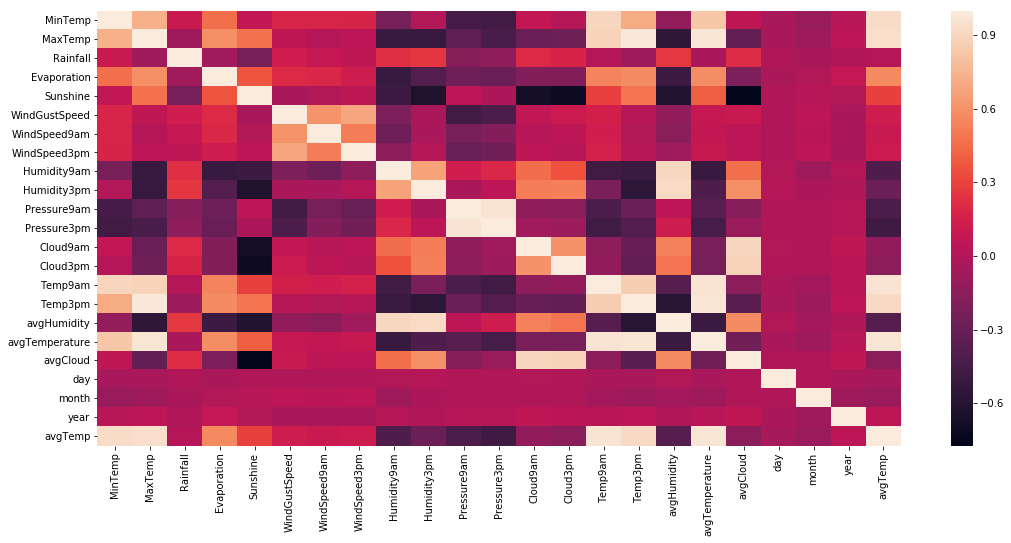

In [39]:
plt.figure(figsize=(18,8))
sb.heatmap(weatherdf.corr())